# PIMA Indians Diabetes


## Data


The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

1. **Pregnancies**: Number of times pregnant
2. **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. **BloodPressure**: Diastolic blood pressure (mm Hg)
4. **SkinThickness**: Triceps skin fold thickness (mm)
5. **Insulin**: 2-Hour serum insulin (mu U/ml)
6. **BMI**: Body mass index (weight in kg/(height in m)^2)
7. **DiabetesPedigreeFunction**: Diabetes pedigree function
8. **Age**: Age (years)
9. **Outcome**: Class variable (0 or 1)

In [1]:
# this is specific to macos X , windows/linux users dont need this 
# without this , while using xgboost , you get errors , kernel dies
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./data/diabetes.csv')
print(df.shape)
df.head(10)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## 0. Load data
## 1. Identifying and correcting Data types
## 2. Data Visualisation & Feature Selection
## 3. Fixing Missing Values - Imputer
## 4. Data Scaling- StandScaler / MinMaxScaler
## 5. Modelling

## 1. Identifying and correcting Data types

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## 2. Data Visualisation & Feature Selection

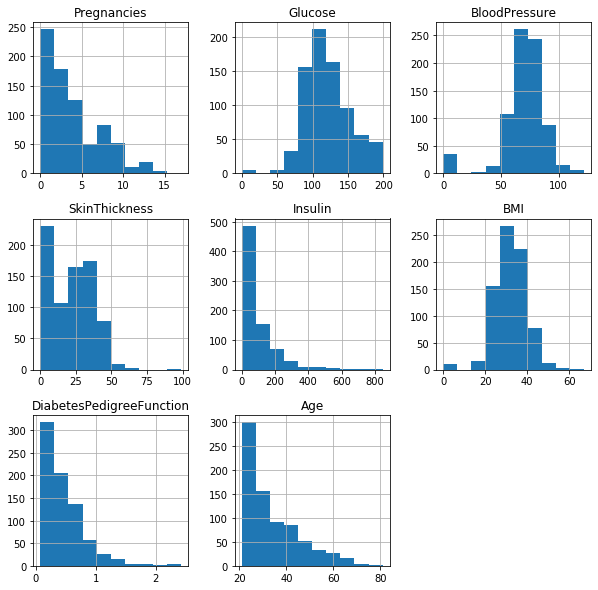

In [6]:
df[df.columns[:8]].hist(figsize=(10,10));   

### Dist Plot

Dist Plot helps us to flexibly plot a univariate distribution of observations.

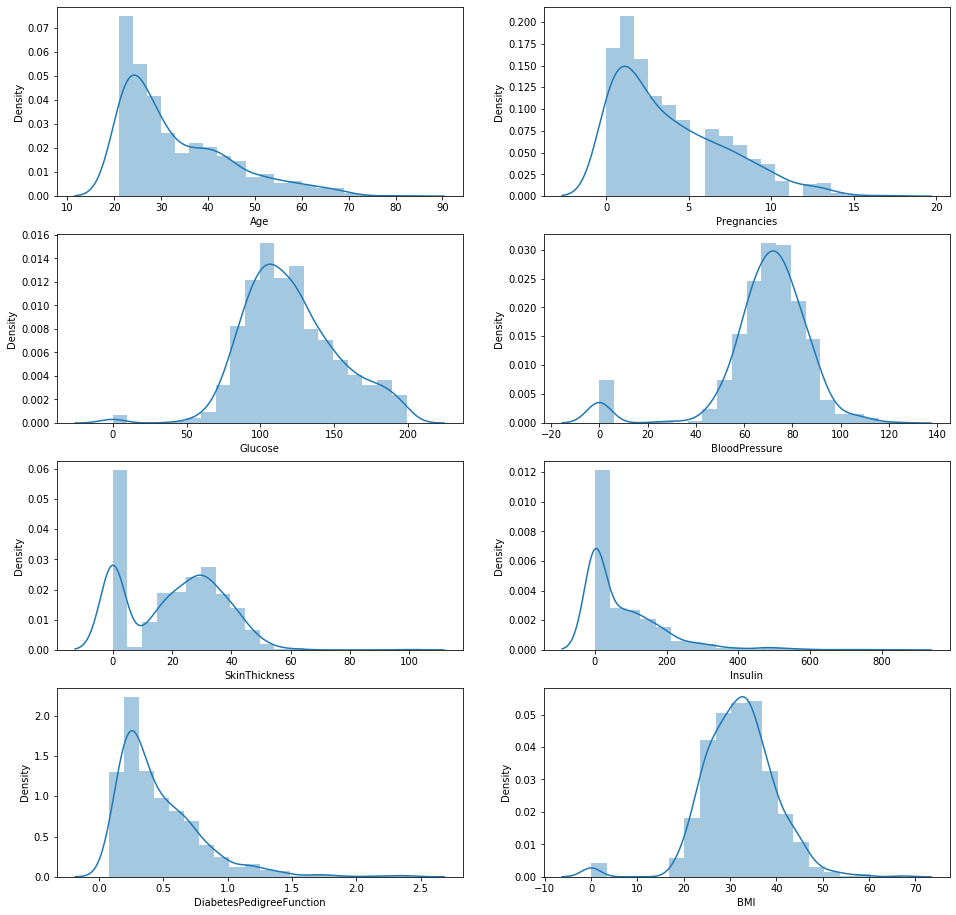

In [7]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

output shows that there are many values for the coloumns that are zero.

In [8]:
# Lets check the figures as well
for c in df.columns:
    if c not in ['Pregnancies', 'Outcome']:
        print ('0 values in', c, ':', sum(df[c]==0))

0 values in Glucose : 5
0 values in BloodPressure : 35
0 values in SkinThickness : 227
0 values in Insulin : 374
0 values in BMI : 11
0 values in DiabetesPedigreeFunction : 0
0 values in Age : 0


## 3. Fixing Missing Values - Imputer

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='median')

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
df[df.columns[1:8]] = pd.DataFrame(imputer.fit_transform(df[df.columns[1:8]]))

In [13]:
# Lets check the figures again
for c in df.columns:
    if c not in ['Pregnancies', 'Outcome']:
        print ('0 values in', c, ':', sum(df[c]==0))

0 values in Glucose : 0
0 values in BloodPressure : 0
0 values in SkinThickness : 0
0 values in Insulin : 0
0 values in BMI : 0
0 values in DiabetesPedigreeFunction : 0
0 values in Age : 0


## 4. Data Scaling- StandScaler / MinMaxScaler

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[df.columns[0:8]])
df[df.columns[0:8]] = scaler.transform(df[df.columns[0:8]])

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501008,0.493742,0.240305,0.152250,0.291518,0.168179,0.204015,0.348958
std,0.198210,0.196376,0.123435,0.095557,0.103826,0.140597,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.129207,0.190184,0.070773,0.050000,0.000000
50%,0.176471,0.470968,0.489796,0.239130,0.133413,0.288344,0.125747,0.133333,0.000000
75%,0.352941,0.620968,0.571429,0.271739,0.136118,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 5. Single Level Modelling

### Dataset Preparation

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [18]:
X.shape, y.shape

((768, 8), (768,))

In [19]:
X[100]

array([0.05882353, 0.76774194, 0.48979592, 0.23913043, 0.13341346,
       0.42535787, 0.48847139, 0.2       ])

In [20]:
np.unique(y)

array([0, 1])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=0)

In [22]:
X_train.shape,  y_train.shape

((576, 8), (576,))

In [23]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([370, 206]))

In [24]:
X_test.shape, y_test.shape

((192, 8), (192,))

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

#Model
LR = LogisticRegression(solver="sag", max_iter=1000)

#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)

In [26]:
# Calculating the accuracies
print("Training accuracy :", LR.score(X_train, y_train))
print("Testing accuracy :", LR.score(X_test, y_test))

Training accuracy : 0.7604166666666666
Testing accuracy : 0.7916666666666666


In [27]:
predictions = LR.predict_proba(X_test)

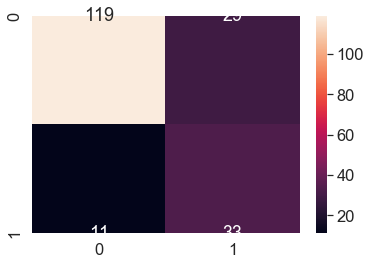

In [28]:
#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [29]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       130
           1       0.75      0.53      0.62        62

    accuracy                           0.79       192
   macro avg       0.78      0.72      0.74       192
weighted avg       0.79      0.79      0.78       192



In [44]:
feature_names = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                    'BMI', 'DiabetesPedigreeFunction', 'Age']].columns.values
feature_names

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [30]:
LR.coef_

array([[ 1.12708648,  4.10971644, -0.27418526,  0.38418255,  0.26179014,
         2.79824091,  1.28508349,  1.0233773 ]])

In [31]:
## Read more here: 
#1. https://towardsdataascience.com/dont-sweat-the-solver-stuff-aea7cddc3451
#2. https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions

### SVM

In [45]:
from sklearn.svm import SVC

# creating the model
svc = SVC(C=5.0, 
            gamma="scale", 
            kernel="linear", 
            class_weight="balanced")

# feeding the training data into the model
svc.fit(X_train, y_train)

# predicting the test set results
y_pred = svc.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", svc.score(X_train, y_train))
print("Testing accuracy :", svc.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

Training accuracy : 0.765625
Testing accuracy : 0.7604166666666666
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       130
           1       0.62      0.66      0.64        62

    accuracy                           0.76       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.76      0.76      0.76       192



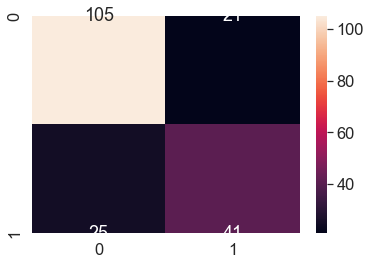

In [46]:
#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

### Decision Tree

Training accuracy : 1.0
Testing Accuracy  0.7552083333333334


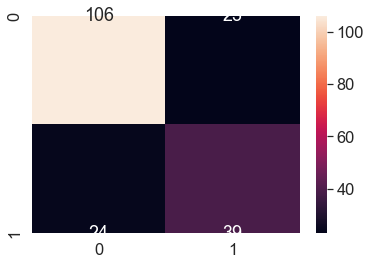

In [47]:
#Model
DT = DecisionTreeClassifier()

#fiting the model
DT.fit(X_train, y_train)

#prediction
y_pred = DT.predict(X_test)

#Accuracy
print("Training accuracy :", DT.score(X_train, y_train))
print("Testing Accuracy ", DT.score(X_test, y_test))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

### Adaboost

Test Accuracy  0.7708333333333334


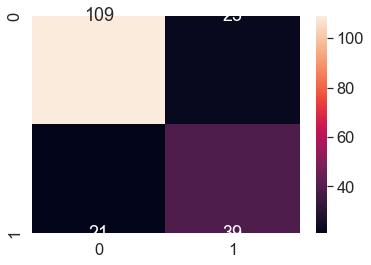

In [35]:
from sklearn.ensemble import AdaBoostClassifier


adb = AdaBoostClassifier(DecisionTreeClassifier(max_depth=None),n_estimators=100, random_state=42)

#fiting the model
adb.fit(X_train, y_train)

#prediction
y_pred = adb.predict(X_test)

#Accuracy
print("Test Accuracy ", adb.score(X_test, y_test))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

# Stacking

#### First level model
Defining the first level models for stacking. <br> 
We are using three models: 
- KNN-Classifier, 
- Random Forest Classifier
- XGBoost Classifier.

In [36]:
# !pip install vecstack
# Also refer to: https://github.com/vecxoz/vecstack

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking

In [38]:
models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)
]

In [39]:
S_train, S_test = stacking(models, X_train, y_train, X_test, 
                           regression=False, mode='oof_pred_bag', 
                           needs_proba=False, save_dir=None, 
                           metric=accuracy_score, n_folds=4, 
                           stratified=True, shuffle=True, 
                           random_state=0,    
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.68750000]
    fold  1:  [0.75000000]
    fold  2:  [0.72916667]
    fold  3:  [0.72222222]
    ----
    MEAN:     [0.72222222] + [0.02250257]
    FULL:     [0.72222222]

model  1:     [RandomForestClassifier]
    fold  0:  [0.75694444]
    fold  1:  [0.78472222]
    fold  2:  [0.68750000]
    fold  3:  [0.79166667]
    ----
    MEAN:     [0.75520833] + [0.04119379]
    FULL:     [0.75520833]

model  2:     [XGBClassifier]
    fold  0:  [0.74305556]
    fold  1:  [0.77777778]
    fold  2:  [0.73611111]
    fold  3:  [0.78472222]
    ----
    MEAN:     [0.76041667] + [0.02112070]
    FULL:     [0.76041667]



#### Second level model

In [40]:
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.77604167]


# Model Interpretation with eli5

In [41]:
import eli5

## Explaining weights

In [42]:
feature_names = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                    'BMI', 'DiabetesPedigreeFunction', 'Age']].columns.values

In [43]:
eli5.show_weights(LR, top=10, feature_names=feature_names, target_names=['No diabetes', 'diabetes'])

Weight?,Feature
+4.110,Glucose
+2.798,BMI
+1.285,DiabetesPedigreeFunction
+1.127,Pregnancies
+1.023,Age
+0.384,SkinThickness
+0.262,Insulin
-0.274,BloodPressure
-4.300,<BIAS>


In [54]:
eli5.show_weights(DT, top=5, feature_names=feature_names, target_names=['No diabetes', 'diabetes'])

In [55]:
eli5.show_weights(adb, top=5, feature_names=feature_names, target_names=['No diabetes', 'diabetes'])

## Explaining predictions

In [56]:
eli5.show_prediction(LR, X_test[7], feature_names=feature_names, target_names=['No diabetes', 'diabetes'], 
                    show_feature_values=True)

In [57]:
eli5.show_prediction(DT, X_test[7], feature_names=feature_names, target_names=['No diabetes', 'diabetes'],
                    show_feature_values=True)

Weight means how much each feature contributed to the final prediction 

# Partial Dependece Plots

- Partial dependence plots (PDP) plots can be used to visualize and analyze interaction between the target response and a set of input features of interest.

- Partial dependence plot (PDP) aims to visualize the marginal effect of a given predictor towards the model outcome by plotting out the average model outcome in terms of different values of the predictor.

- Partial dependence plots (PDP) show the dependence between the target response and a set of input features of interest, marginalizing over the values of all other input features (the ‘complement’ features). Intuitively, we can interpret the partial dependence as the expected target response as a function of the input features of interest.

- One-way PDPs tell us about the interaction between the target response and an input feature of interest feature (e.g. linear, non-linear)

- PDPs with two input features of interest show the interactions among the two features. 

In [58]:
from sklearn.inspection import PartialDependenceDisplay

In [59]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [60]:
features = [1, 2] # Glucose, BMI

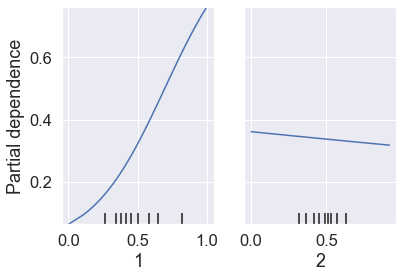

In [61]:
PartialDependenceDisplay.from_estimator(LR, X_test, features)

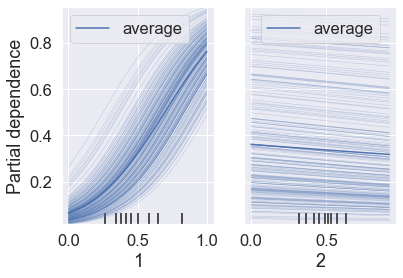

In [62]:
PartialDependenceDisplay.from_estimator(LR, X_test, features, kind='both')